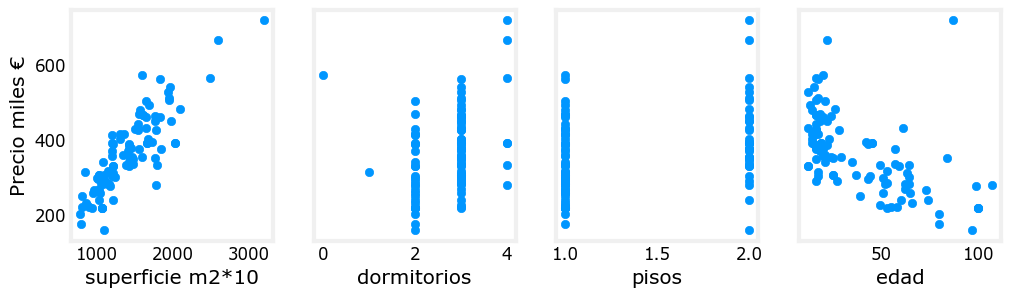

In [2]:
# utilizamos las siguientes librerías
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# cargamos los datos
X_train, y_train = load_house_data()
X_features = ['superficie m2*10','dormitorios','pisos','edad']

#inicializamos los parámetros de la función
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Precio miles €")
plt.show()



In [3]:
def predict(x, w, b): 
    """
   predicción mediante regresión lineal
     Argumentos:
       x (ndarray): ejemplo de forma (n,) con múltiples características
       w (ndarray): parámetros del modelo de forma (n,)
       b (escalar): parámetro del modelo
      
     Retorna:
       p (escalar): predicción
    """
    p = np.dot(x, w) + b     
    return p    

def compute_cost(X, y, w, b): 
    """
    cálculo del coste
     Argumentos:
       X (matriz (m, n)): datos, m ejemplos con n características
       y (cadena (m,)): valores objetivo
       w (cadena (n,)): parámetros del modelo
       b (escalar): parámetro del modelo
      
     Retorna :
       cost (escalar): coste
​
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar
        cost = cost + (f_wb_i - y[i])**2       #escalar
    cost = cost / (2 * m)                      #escalar    
    return cost
def compute_gradient(X, y, w, b): 
    """
    Calcula el gradiente para la regresión lineal.
     Argumentos:
       X (ndarray (m,n)): datos, m ejemplos con n características
       y (ndarray (m,)): valores objetivo
       w (ndarray (n,)): parámetros del modelo
       b (escalar): parámetro del modelo
      
     Retorna:
       dj_dw (ndarray (n,)): el gradiente del costo w.r.t. los parámetros w.
       dj_db (escalar): el gradiente del costo w.r.t. el parámetro b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Realiza el descenso de gradiente por lotes para aprender w y b. Actualiza w y b tomando
     num_iters pasos de gradiente con tasa de aprendizaje alfa
    
     Argumentos:
       X (ndarray (m,n)): datos, m ejemplos con n características
       y (ndarray (m,)): valores objetivo
       w_in (ndarray (n,)): parámetros iniciales del modelo
       b_in (escalar): parámetro del modelo inicial
       cost_function: función para calcular el costo
       gradient_function: función para calcular el gradiente
       alfa (flotante): tasa de aprendizaje
       num_iters (int): número de iteraciones para ejecutar el descenso de gradiente
      
     Retorna:
       w (ndarray (n,)): valores actualizados de los parámetros
       b (escalar): valor actualizado del parámetro
​
      """
    
    # Una matriz para almacenar el coste J y w en cada iteración ç.
    J_history = []
    w = copy.deepcopy(w_in) 
    b = b_in
    
    for i in range(num_iters):

        # Calcula el gradiente y actualiza los parámetros.
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Actualiza parámetros usando w, b, alfa y gradiente
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Guarda cost J en cada iteración
        if i<100000:      
            J_history.append( cost_function(X, y, w, b))

        # Muestra Coste da intervalos de 10 veces o tantas iteraciones si <10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #devuelve el historial final de w, by J para grafico

# inicializa parámetros
initial_w = np.zeros_like(w_init)
initial_b = 0.
# algunas configuraciones de descenso de gradiente
iterations = 1000
alpha = 5.0e-7
# ejecuta descenso de gradiente  
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w encontrados con descenso del gradiente: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"predición: {np.dot(X_train[i], w_final) + b_final:0.2f}, valor objetivo: {y_train[i]}")


Iteration    0: Cost  2161.10   
Iteration  100: Cost  1558.75   
Iteration  200: Cost  1539.04   
Iteration  300: Cost  1521.05   
Iteration  400: Cost  1504.63   
Iteration  500: Cost  1489.65   
Iteration  600: Cost  1475.97   
Iteration  700: Cost  1463.49   
Iteration  800: Cost  1452.10   
Iteration  900: Cost  1441.70   
b,w encontrados con descenso del gradiente: 0.00,[ 0.26 -0.   -0.   -0.26] 
predición: 305.58, valor objetivo: 300.0
predición: 500.21, valor objetivo: 509.8
predición: 436.06, valor objetivo: 394.0
predición: 503.85, valor objetivo: 540.0
predición: 336.92, valor objetivo: 415.0
predición: 206.55, valor objetivo: 230.0
predición: 471.44, valor objetivo: 560.0
predición: 254.61, valor objetivo: 294.0
predición: 804.99, valor objetivo: 718.2
predición: 183.15, valor objetivo: 200.0
predición: 306.57, valor objetivo: 302.0
predición: 398.85, valor objetivo: 468.0
predición: 365.40, valor objetivo: 374.2
predición: 312.29, valor objetivo: 388.0
predición: 266.18, v

In [4]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

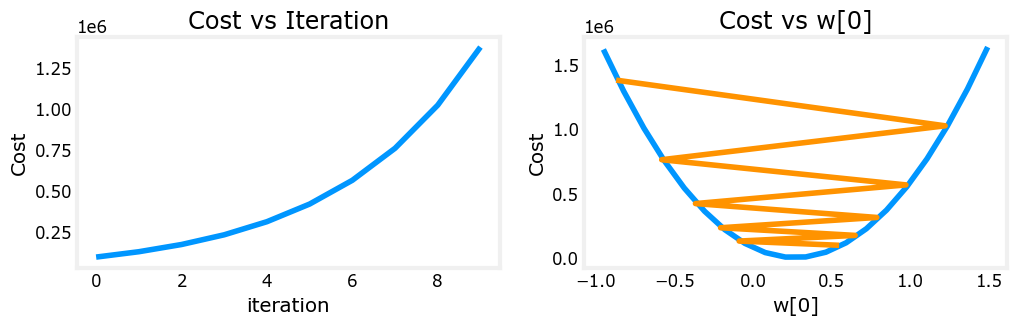

In [5]:
plot_cost_i_w(X_train, y_train, hist)

In [6]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

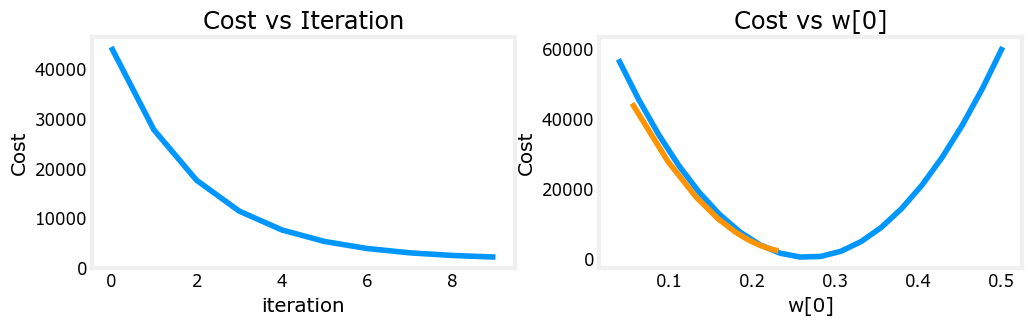

In [7]:
plot_cost_i_w(X_train,y_train,hist)

In [8]:
def zscore_normalize_features(X):
    """
    calcula X, z-score normalizado por columna
    
     Argumentos:
       X (ndarray (m,n)): datos de entrada, m ejemplos, n características
      
     Devoluciones:
       X_norm (ndarray (m,n)): entrada normalizada por columna
       mu (ndarray (n,)): media de cada característica
       sigma (ndarray (n,)): desviación estándar de cada característica
     """
     # encontrar la media de cada columna/característica
    mu     = np.mean(X, axis=0)                # mu tendrá forma (n,)
     # encontrar la desviación estándar de cada columna/característica
    sigma  = np.std(X, axis=0)                  # sigma tendrá forma (n,)
     # por elementos, resta mu para esa columna de cada ejemplo, divide por std para esa columna
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)


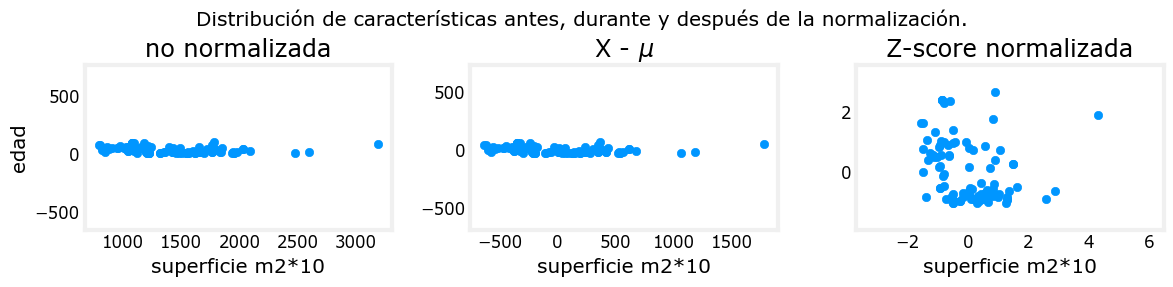

In [9]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("no normalizada")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalizada")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Distribución de características antes, durante y después de la normalización.")
plt.show()

In [10]:
# normalizar las características originales
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


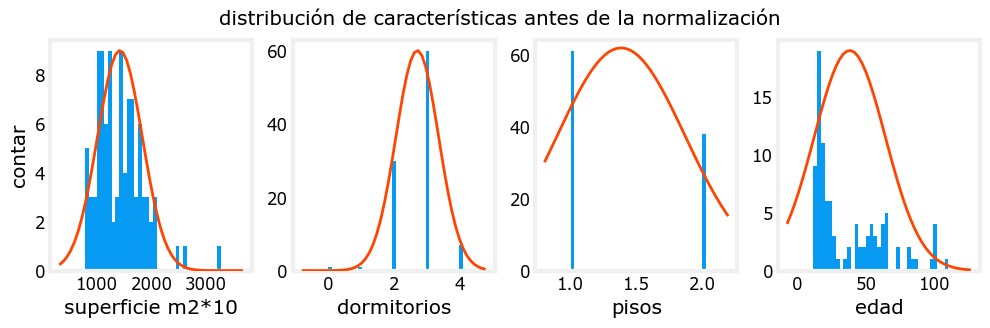

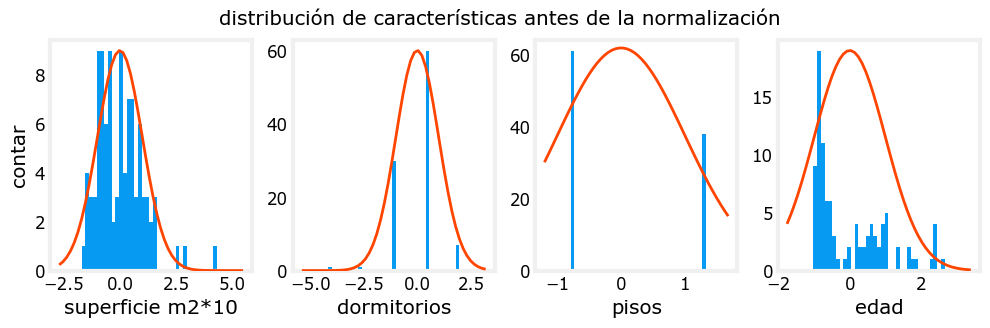

In [11]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("contar");
fig.suptitle("distribución de características antes de la normalización")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("contar"); 
fig.suptitle("distribución de características antes de la normalización")

plt.show()

In [12]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

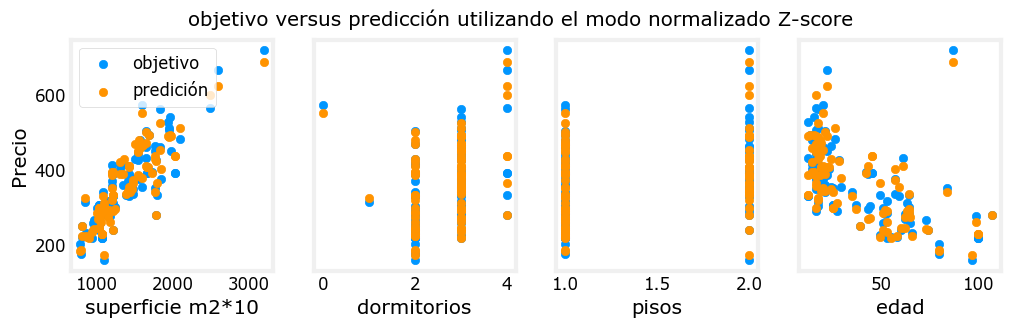

In [13]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'objetivo')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predición')
ax[0].set_ylabel("Precio"); ax[0].legend();
fig.suptitle("objetivo versus predicción utilizando el modo normalizado Z-score")
plt.show()

In [14]:
# Predición de nueva vivienda.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predición del precio de vivienda de 120 m2, 3 dormitorios, 1 piso, 40 años = {x_house_predict*1000:0.0f} €")

[-0.53  0.43 -0.79  0.06]
 predición del precio de vivienda de 120 m2, 3 dormitorios, 1 piso, 40 años = 318709 €
